In [17]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import io
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import time
import pickle

# Source: Coursera "Convolutional Neural Networks" C4M1 code

%matplotlib inline
np.random.seed(1)

In [2]:
# 2 classes, native vs non-native
classes = 2
X_train = np.expand_dims(np.load('X_train_full.npy'), axis = 3)
y_train = np.load('y_train_full.npy').flatten()
X_val = np.expand_dims(np.load('X_dev.npy'), axis = 3)
y_val = np.load('y_dev.npy').flatten()
X_test = np.expand_dims(np.load('X_test.npy'), axis = 3)
y_test = np.load('y_test.npy').flatten()


# construct 1-hot vector
Y_test = np.zeros((y_test.shape[0], 2)) # 2 classes 
Y_test[np.arange(y_test.shape[0]), y_test] = 1

Y_val = np.zeros((y_val.shape[0], 2)) # 2 classes 
Y_val[np.arange(y_val.shape[0]), y_val] = 1

Y_train = np.zeros((y_train.shape[0], 2)) # 2 classes 
Y_train[np.arange(y_train.shape[0]), y_train] = 1

print('Y_train shape is: ', Y_train.shape)
print('y_test: ', y_train[:10])
print('Y_test: ', Y_train[:10])

print('Y_test shape is: ', Y_test.shape)
print('y_test: ', y_test[:10])
print('Y_test: ', Y_test[:10])

Y_train shape is:  (82158, 2)
y_test:  [1 1 0 1 1 1 0 0 0 1]
Y_test:  [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Y_test shape is:  (5036, 2)
y_test:  [1 1 0 0 1 1 1 1 0 0]
Y_test:  [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [3]:
print('X_train shape is: ', X_train.shape)

print('Y_train shape is: ', Y_train.shape)
print('y_test: ', y_train[:10])
print('Y_test: ', Y_train[:10])

print('Y_test shape is: ', Y_test.shape)
print('y_test: ', y_test[:10])
print('Y_test: ', Y_test[:10])

X_train shape is:  (82158, 205, 110, 1)
Y_train shape is:  (82158, 2)
y_test:  [1 1 0 1 1 1 0 0 0 1]
Y_test:  [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Y_test shape is:  (5036, 2)
y_test:  [1 1 0 0 1 1 1 1 0 0]
Y_test:  [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [4]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    return X, Y

In [5]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)
    ### Set up variables for W ###
    W1 = tf.get_variable("W1", [5, 5, 1, 32], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [5, 5, 32, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W3 = tf.get_variable("W3", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W4 = tf.get_variable("W4", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W5 = tf.get_variable("W5", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W6 = tf.get_variable("W6", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W7 = tf.get_variable("W7", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W8 = tf.get_variable("W8", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W9 = tf.get_variable("W9", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W10 = tf.get_variable("W10", [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))

    ### Set up variables for b ###
    b1 = tf.get_variable("b1", [32], initializer = tf.constant_initializer(0))
    b2 = tf.get_variable("b2", [64], initializer = tf.constant_initializer(0))
    b3 = tf.get_variable("b3", [64], initializer = tf.constant_initializer(0))
    b4 = tf.get_variable("b4", [64], initializer = tf.constant_initializer(0))
    b5 = tf.get_variable("b5", [64], initializer = tf.constant_initializer(0))
    b6 = tf.get_variable("b6", [64], initializer = tf.constant_initializer(0))
    b7 = tf.get_variable("b7", [64], initializer = tf.constant_initializer(0))
    b8 = tf.get_variable("b8", [64], initializer = tf.constant_initializer(0))
    b9 = tf.get_variable("b9", [64], initializer = tf.constant_initializer(0))
    b10 = tf.get_variable("b10", [64], initializer = tf.constant_initializer(0))



    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3,
                  "W4": W4,
                  "W5": W5,
                  "W6": W6,
                  "W7": W7,
                  "W8": W8,
                  "W9": W9,
                  "W10":W10,
                  "b1": b1,
                  "b2": b2,
                  "b3": b3,
                  "b4": b4,
                  "b5": b5,
                  "b6": b6,
                  "b7": b7,
                  "b8": b8,
                  "b9": b9,
                  "b10":b10
                 }

    
    return parameters

In [6]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[0]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,...]
    shuffled_Y = Y[permutation,...]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):

        mini_batch_X = shuffled_X[k * mini_batch_size:(k + 1) * mini_batch_size, ...]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k + 1) * mini_batch_size, ...]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:

        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size: , ...]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size:, ...]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [7]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    (CONV2D -> RELU -> MAXPOOL)x10  -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    W10 = parameters['W10']

    b1 = parameters['b1']
    b2 = parameters['b2']
    b3 = parameters['b3']
    b4 = parameters['b4']
    b5 = parameters['b5']
    b6 = parameters['b6']
    b7 = parameters['b7']
    b8 = parameters['b8']
    b9 = parameters['b9']
    b10 = parameters['b10']

    
    # 1
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1 + b1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding='SAME')
    
    # 2
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2 + b2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 3
    # CONV2D: filters W3, stride 1, padding 'SAME'
    Z3 = tf.nn.conv2d(P2, W3, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A3 = tf.nn.relu(Z3 + b3)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P3 = tf.nn.max_pool(A3, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 4
    # CONV2D: filters W4, stride 1, padding 'SAME'
    Z4 = tf.nn.conv2d(P3, W4, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A4 = tf.nn.relu(Z4 + b4)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P4 = tf.nn.max_pool(A4, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 5
    # CONV2D: filters W5, stride 1, padding 'SAME'
    Z5 = tf.nn.conv2d(P4, W5, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A5 = tf.nn.relu(Z5 + b5)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P5 = tf.nn.max_pool(A5, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 6
    # CONV2D: filters W5, stride 1, padding 'SAME'
    Z6 = tf.nn.conv2d(P5, W6, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A6 = tf.nn.relu(Z6 + b6)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P6 = tf.nn.max_pool(A6, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 7
    # CONV2D: filters W5, stride 1, padding 'SAME'
    Z7 = tf.nn.conv2d(P6, W7, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A7 = tf.nn.relu(Z7 + b7)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P7 = tf.nn.max_pool(A7, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 8
    # CONV2D: filters W5, stride 1, padding 'SAME'
    Z8 = tf.nn.conv2d(P7, W8, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A8 = tf.nn.relu(Z8 + b8)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P8 = tf.nn.max_pool(A8, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 9
    # CONV2D: filters W5, stride 1, padding 'SAME'
    Z9 = tf.nn.conv2d(P8, W9, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A9 = tf.nn.relu(Z9 + b9)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P9 = tf.nn.max_pool(A9, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # 10
    # CONV2D: filters W5, stride 1, padding 'SAME'
    Z10 = tf.nn.conv2d(P9, W10, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A10 = tf.nn.relu(Z10 + b8)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P10 = tf.nn.max_pool(A10, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    
    # FLATTEN
    P = tf.contrib.layers.flatten(P10)
    
    # FULLY-CONNECTED without non-linear activation function (not call softmax).
    # Hint: one of the arguments should be "activation_fn=None" 
    Z11 = tf.contrib.layers.fully_connected(P, 2, activation_fn=None)

    return Z11

In [8]:
def compute_cost(Z11, Y):
    """
    Computes the cost
    
    Arguments:
    Z11 -- output of forward propagation (output of the last LINEAR unit)
    Y -- "true" labels vector placeholder
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z11, labels=Y))
    
    return cost

In [9]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.001,
          num_epochs=10, minibatch_size=64, print_cost=True):
    """
    Implements a ten-layer ConvNet in Tensorflow:
    (CONV2D -> RELU -> MAXPOOL)x10  -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set
    Y_train -- test set
    X_test -- training set
    Y_test -- test set
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape   
    n_y = Y_train.shape[1] 
    print('n_y is: ', Y_train.shape[1])
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z11 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z11, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    # Start the session to compute the tensorflow graph
    with tf.Session(config = config) as sess:
        with tf.device("/gpu:0") as dev:
        
            # Run the initialization
            sess.run(init)

            # Do the training loop
            for epoch in range(num_epochs):
                start_time = time.time()
                minibatch_cost = 0.
                num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
                seed = seed + 1
                minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

                for minibatch in minibatches:

                    # Select a minibatch
                    (minibatch_X, minibatch_Y) = minibatch
                    # IMPORTANT: The line that runs the graph on a minibatch.
                    # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                    _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})

                    minibatch_cost += temp_cost / num_minibatches


                # Print the cost every epoch
                if print_cost == True and epoch % 1 == 0:
                    print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
                if print_cost == True and epoch % 1 == 0:
                    costs.append(minibatch_cost)
                    
                # time
                end_time = time.time()
                print("elapsed time: ", end_time - start_time)


            # plot the cost
            print(np.squeeze(costs))
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

            # Calculate the correct predictions
            predict_op = tf.argmax(Z11, 1)
            correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

            # Calculate accuracy on the test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            train_accuracy = 0.
            test_accuracy = 0.
            train_prediction_after_shuffle = []
            train_y_after_shuffle = []
            
            # evaluate test in minimathces because of the OOM     
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            total_ex_num = 0
            for index, minibatch in enumerate(minibatches):

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                cur_train_accuracy = accuracy.eval({X: minibatch_X, Y: minibatch_Y})
                
                train_prediction_after_shuffle.append(predict_op.eval({X: minibatch_X, Y: minibatch_Y}))
                train_y_after_shuffle.append(np.argmax(minibatch_Y, 1))
                
                
                cur_ex_num = minibatch_X.shape[0]
                train_accuracy = (train_accuracy * total_ex_num + cur_train_accuracy * cur_ex_num) / (total_ex_num + cur_ex_num)
                total_ex_num += cur_ex_num
                
                
            
            test_prediction_after_shuffle = []
            test_y_after_shuffle = []
          
                
            # evaluate test in minimathces because of the OOM     
            minibatches = random_mini_batches(X_test, Y_test, minibatch_size, seed) 
            total_ex_num = 0
            for index, minibatch in enumerate(minibatches):
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                cur_test_accuracy = accuracy.eval({X: minibatch_X, Y: minibatch_Y})
                
                test_prediction_after_shuffle.append(predict_op.eval({X: minibatch_X, Y: minibatch_Y}))
                test_y_after_shuffle.append(np.argmax(minibatch_Y, 1))
                
                cur_ex_num = minibatch_X.shape[0]
                test_accuracy = (test_accuracy * total_ex_num + cur_test_accuracy * cur_ex_num) / (total_ex_num + cur_ex_num)
                total_ex_num += cur_ex_num
            

#             train_accuracy = accuracy.eval({X: X_train[:10,...], Y: Y_train[:10,...]})
#             test_accuracy = accuracy.eval({X: X_test[:10, ...], Y: Y_test[:10, ...]})
            print("Train Accuracy:", train_accuracy)
            print("Test Accuracy:", test_accuracy)

            return train_accuracy, test_accuracy, parameters, \
            train_prediction_after_shuffle, train_y_after_shuffle,\
            test_prediction_after_shuffle, test_y_after_shuffle

n_y is:  2
Cost after epoch 0: 0.462440
elapsed time:  70.70240902900696
Cost after epoch 1: 0.223368
elapsed time:  69.01126480102539
Cost after epoch 2: 0.157911
elapsed time:  69.442697763443
Cost after epoch 3: 0.124887
elapsed time:  68.86612510681152
Cost after epoch 4: 0.106518
elapsed time:  69.26138687133789
Cost after epoch 5: 0.088888
elapsed time:  68.94049739837646
Cost after epoch 6: 0.079042
elapsed time:  69.39728593826294
Cost after epoch 7: 0.070421
elapsed time:  68.95178985595703
Cost after epoch 8: 0.061769
elapsed time:  69.68916463851929
Cost after epoch 9: 0.055659
elapsed time:  69.0571641921997
Cost after epoch 10: 0.050127
elapsed time:  69.18154954910278
Cost after epoch 11: 0.046157
elapsed time:  69.5993549823761
Cost after epoch 12: 0.042806
elapsed time:  69.50884962081909
Cost after epoch 13: 0.037188
elapsed time:  69.05594515800476
Cost after epoch 14: 0.036533
elapsed time:  69.17486381530762
Cost after epoch 15: 0.032863
elapsed time:  68.5163567066

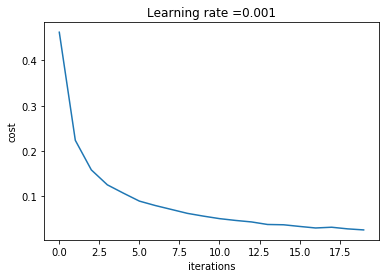

Train Accuracy: 0.9920884150052338
Test Accuracy: 0.9781572676727561
prediction after shuffle type is:  <class 'numpy.ndarray'>
y_after_shuffle type is :  <class 'numpy.ndarray'>


In [11]:
# Run the model

_, _, parameters, \
train_prediction_after_shuffle, train_y_after_shuffle,\
 test_prediction_after_shuffle, test_y_after_shuffle,\
    = model(X_train, Y_train, X_test, Y_test, learning_rate=0.001, \
          num_epochs=20, minibatch_size=64, print_cost=True)
print('prediction after shuffle type is: ', type(train_prediction_after_shuffle[0]))
print('y_after_shuffle type is : ', type(train_y_after_shuffle[0]))

train_prediction_after_shuffle = np.concatenate(train_prediction_after_shuffle).ravel().tolist()
train_y_after_shuffle = np.concatenate(train_y_after_shuffle).ravel().tolist()
test_prediction_after_shuffle = np.concatenate(test_prediction_after_shuffle).ravel().tolist()
test_y_after_shuffle = np.concatenate(test_y_after_shuffle).ravel().tolist()


In [12]:
# 

confusion_matrix = \
     tf.contrib.metrics.confusion_matrix(\
         labels = test_y_after_shuffle, predictions = test_prediction_after_shuffle)
                                            

a = tf.Variable(tf.constant(test_prediction_after_shuffle, dtype=tf.int32))
b = tf.Variable(tf.constant(test_y_after_shuffle, dtype=tf.int32))
_, test_precision = tf.metrics.precision(labels = b, predictions = a)
_, test_recall= tf.metrics.recall(labels = b, predictions = a)


init_g = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()
with tf.Session() as sess:
    sess.run(init_g)
    sess.run(init_l)
    recall = sess.run(test_recall)
    precision = sess.run(test_precision)
    confusion_matrix = sess.run(confusion_matrix)
    

print('confusion matrix is: ', confusion_matrix)
print('recall is: ', recall)
print('precision is: ', precision)

                                        

confusion matrix is:  [[1945   59]
 [  51 2981]]
recall is:  0.9831794
precision is:  0.98059213


In [13]:
print(parameters)

{'W1': <tf.Variable 'W1:0' shape=(5, 5, 1, 32) dtype=float32_ref>, 'W2': <tf.Variable 'W2:0' shape=(5, 5, 32, 64) dtype=float32_ref>, 'W3': <tf.Variable 'W3:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W4': <tf.Variable 'W4:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W5': <tf.Variable 'W5:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W6': <tf.Variable 'W6:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W7': <tf.Variable 'W7:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W8': <tf.Variable 'W8:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W9': <tf.Variable 'W9:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'W10': <tf.Variable 'W10:0' shape=(5, 5, 64, 64) dtype=float32_ref>, 'b1': <tf.Variable 'b1:0' shape=(32,) dtype=float32_ref>, 'b2': <tf.Variable 'b2:0' shape=(64,) dtype=float32_ref>, 'b3': <tf.Variable 'b3:0' shape=(64,) dtype=float32_ref>, 'b4': <tf.Variable 'b4:0' shape=(64,) dtype=float32_ref>, 'b5': <tf.Variable 'b5:0' shape=(64,) dtype=float32_ref>, 'b6': <tf.Variable 'b6:0' shape=(64,) 

In [18]:
scipy.io.savemat("parameters.mat", parameters)

In [ ]:
# Run the model

_, _, parameters, \
train_prediction_after_shuffle, train_y_after_shuffle,\
 test_prediction_after_shuffle, test_y_after_shuffle,\
    = model(X_train, Y_train, X_test, Y_test, learning_rate=0.001, \
          num_epochs=50, minibatch_size=64, print_cost=True)
print('prediction after shuffle type is: ', type(train_prediction_after_shuffle[0]))
print('y_after_shuffle type is : ', type(train_y_after_shuffle[0]))

train_prediction_after_shuffle = np.concatenate(train_prediction_after_shuffle).ravel().tolist()
train_y_after_shuffle = np.concatenate(train_y_after_shuffle).ravel().tolist()
test_prediction_after_shuffle = np.concatenate(test_prediction_after_shuffle).ravel().tolist()
test_y_after_shuffle = np.concatenate(test_y_after_shuffle).ravel().tolist()


n_y is:  2
Cost after epoch 0: 0.430715
elapsed time:  70.7367205619812
Cost after epoch 1: 0.216173
elapsed time:  70.83349847793579
Cost after epoch 2: 0.158065
elapsed time:  70.29838180541992
Cost after epoch 3: 0.123296
elapsed time:  70.56411480903625
Cost after epoch 4: 0.101402
elapsed time:  70.08637523651123
Cost after epoch 5: 0.085115
elapsed time:  69.71751737594604
Cost after epoch 6: 0.075199
elapsed time:  69.56051135063171
Cost after epoch 7: 0.066363
elapsed time:  69.70854330062866
Cost after epoch 8: 0.056658
elapsed time:  70.13554120063782
Cost after epoch 9: 0.051109
elapsed time:  69.8525390625
Cost after epoch 10: 0.047343
elapsed time:  69.92364692687988
Cost after epoch 11: 0.042734
elapsed time:  69.74899220466614
Cost after epoch 12: 0.041282
elapsed time:  69.77764940261841
Cost after epoch 13: 0.037438
elapsed time:  69.63103151321411
Cost after epoch 14: 0.034488
elapsed time:  69.8895697593689
Cost after epoch 15: 0.030308
elapsed time:  70.148219823837